In [1]:
include("../find_meteor.jl")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/Users/guochu/Documents/QuantumSimulator/Meteor.jl/src"

In [2]:
using Meteor.Utility
using Meteor.ExactDiag

In [3]:
# the qubits are in a colum-major convention
function Ising_model_2d(height::Int, width::Int, Jh::Real, Jv::Real, h::Real)
    N = width * height
    model = spin_chain(N, issymmetric=false, isunitary=true)
    for i in 1:N
        add!(model, (i,), ("sz",), coeff=h)
    end
    for i in 1:width
        for j in 1:height-1
            k = (i-1) * height + j
            add!(model, (k, k+1), ("sx", "sx"), coeff=-Jv)
        end
    end
    for i in 1:width-1
        for j in 1:height
            k = (i-1) * height + j
            add!(model, (k, k + height), ("sx", "sx"), coeff=-Jh)
        end
    end
    for i in 1:N
        add_observer!(model, (i,), ("sz",), name="z")
    end
    return model
end

Ising_model_2d (generic function with 1 method)

In [4]:
height = 4
width = 5


Jh = 1. #coupling in the horizontal direction
Jv = 0.8 #coupling in the vertical direction

h = 0.5 #on-site potential

model = Ising_model_2d(width, height, Jh, Jv, h)

println(typeof(model))

Meteor.ExactDiag.Model.UnitaryModel{Hamiltonian{AbstractArray{T,2} where T},EDObservers}


In [5]:
initial_state = zeros(Int, height, width)
for i in 1:height
    for j in 1:2:width
        initial_state[i, j] = 1
    end
end

product_state!(model, reshape(initial_state, height * width))

1048576-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [ ]:
t = 10.
mt = 0.1
dt = 0.01
D = 200 # largest bond dimension allowed

# second order trotter algorithm for time evolution
results = evolve!(model, t=t, mt = mt, dt=dt, maxbonddimension=D, driver="krylov") 
obs = results.observables

total evolution step 100.
time evolution step 1......
time evolution step 2......
time evolution step 3......
time evolution step 4......
time evolution step 5......
time evolution step 6......
time evolution step 7......
time evolution step 8......
time evolution step 9......
time evolution step 10......
time evolution step 11......
time evolution step 12......
time evolution step 13......
time evolution step 14......
time evolution step 15......
time evolution step 16......
time evolution step 17......
time evolution step 18......
time evolution step 19......


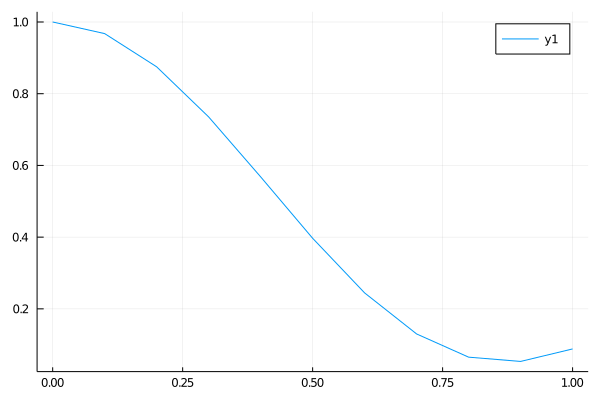

In [7]:
using Plots
ts = collect(0:mt:t)
pgl = plot(ts, obs["z[1]"])